# Second assignment
The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1), 1.2), 1.3), 1.4), 1.5), 1.6), 2.1), 2.2), 2.3), 2.4) and 2.5). After each task description there is an answer cell for your code or text. For coding tasks they look like this:

```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!

After you finished the notebook you can hit the "Validate" button on the top of the notebook to see if all test are good. You can also use the "Validate" button on the "Assignment" tap on the main page of python.ldv.ei.tum.de. Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the ami22 folder or subfolders.
- Do not override the original files in the ami22 folder or subfolders.
- For every plot makes sure that axes are correctly labeled with original labels and not encoded ones. 
- If you are asked to provide multiple plots, make sure that the titles are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted. 

#### Date of submission: May 11th, 2023, 23:55 hrs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC

%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("colorblind")

## Task 1 - Metrics
You will examine 4 small data sets. Each of them contains only one predictor and one target. First the data will be loaded.

In [2]:
data = pd.read_csv('ass02_task01_data.csv')
data.head()

,x0,x1,x2,x3,y0,y1,y2,y3
0,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
1,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
2,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
3,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
4,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47


Johannes Daten claims to already have a very versatile model that can predict the respective target y very well for all 4 datasets. 

### Task 1.1
Use the python module pickle to load the model model.sav. Use the variable model to store the loaded estimator.

In [5]:
import pickle

# YOUR CODE HERE
model = pickle.load(open('model.sav', 'rb'))

### Task 1.2
To analyze the performance of the model on the different datasets, we need to choose some metrics. We want to use the Root Mean Squared Error (RMSE) and the Pearson Correlation Coefficient, but unfortunately, sklearn has no suitable implementation for it.

Implement the two methods `root_mean_squared_error(y, y_pred)` and `r_pearson(y, y_pred)`, where `y` and `y_pred` are arrays with the shape `(num_of_samples, )`.

In [15]:
def root_mean_squared_error(y, y_pred):
    # YOUR CODE HERE
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return rmse


def r_pearson(y, y_pred):
    # YOUR CODE HERE
    y_sum = sum(y)
    y_pred_sum = sum(y_pred)
    y_2_sum = sum(np.square(y))
    y_pred_2_sum = sum(np.square(y_pred))
    prod_sum = sum(np.multiply(y, y_pred))
    
    numer = len(y)*prod_sum - y_sum*y_pred_sum
    denom = np.sqrt((len(y)*y_2_sum - pow(y_sum,2)) * (len(y)*y_pred_2_sum - pow(y_pred_sum,2)))
    rp = numer/denom
    return rp

### Task 1.3
Now test with the 4 data sets what the model is good for. In the variable `metrics` there are already 4 metric functions which you should use. Calculate your predictions with the help of the loaded model and the corresponding predictor _x0,x1,x2,x3_. Apply the metrics for your respective predictions and the target _y0,y1,y2,y3_. Append the respective result to the list `metlist`.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


,dataset,model,metric,value
0,0,JD,MSE,1.251155
1,1,JD,MSE,1.252391
2,2,JD,MSE,1.250564
3,3,JD,MSE,1.249318
4,0,JD,RMSE,1.118550
5,1,JD,RMSE,1.119103
6,2,JD,RMSE,1.118286
7,3,JD,RMSE,1.117729
8,0,JD,r,0.816421
9,1,JD,r,0.816237


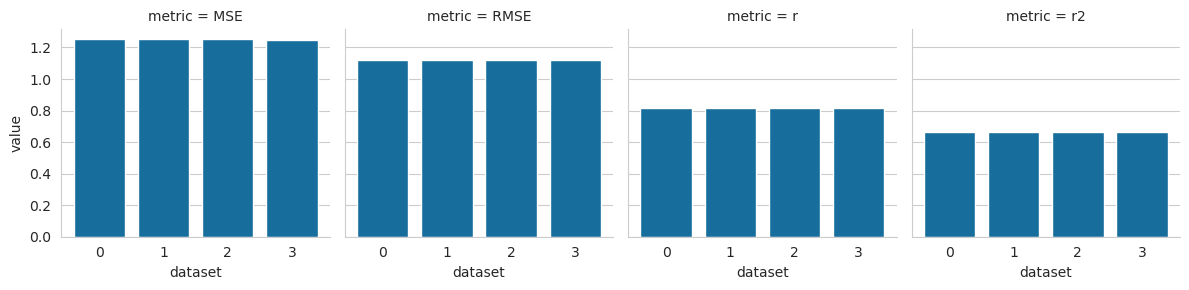

In [21]:
metrics = [mean_squared_error, root_mean_squared_error, r_pearson, r2_score]
metlist = []
for met in metrics:
    # YOUR CODE HERE
    for i in range(4):
        x = data.iloc[:, i]
        y = data.iloc[:, i+4]
        y_pred = model.predict(x.values.reshape(-1,1))
        metlist.append(met(y,y_pred))    
    
metdf = pd.DataFrame({'dataset': 4*[0,1,2,3], 'model': 16*['JD'], 'metric': 4*['MSE']+4*['RMSE']+4*['r']+4*['r2'], 'value': metlist})

g = sns.FacetGrid(data=metdf, col='metric')
g.map(sns.barplot, 'dataset', 'value')
plt.plot()
metdf

You suggest to Johannes Daten that he is into dusty old models. You decide to fit a neural network for each data set.

### Task 1.4
You are given a for-loop and the list `mlps`. At first, we fit a `StandardScaler` `stsc` to all of the `x` data. Now, create and fit a scikit-learn- `MLPRegressor()` within the for-loop (do not create the `MLPRegressor()` outside) on each of the 4 datasets (i.e. (x0,y0), (x1,y1) and so on). Use the `stsc` to transform the `x` data in each loop before fitting the model. Append each **fitted** estimator to the list `mlps`. Use 3 hidden layers with 128, 64 and 32 neurons. Set the parameters `max_iter=100000` and `n_iter_no_change=1000`. Use `random_state=42`.

In [33]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

stsc = StandardScaler()
stsc.fit(pd.concat([data.x0, data.x1, data.x2, data.x3]).array.reshape(-1, 1))

mlps = []
for m in range(0,4):
    # YOUR CODE HERE
    x = data.iloc[:, m]
    y = data.iloc[:, m+4]
    x_sc = stsc.transform(x.values.reshape(-1,1))
    mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=100000, n_iter_no_change=1000, random_state=42).fit(x_sc, y)
    mlps.append(mlp)
    

Looking at all 4 data sets, we see that all 4 predictors are in the range between 3 and 20. 

### Task 1.5
Create a variable `x` with 100 values ranging from 3 to 20. The 3 and 20 should be included. Predict the y-values to these x-values with the model `mlps[0]` and the model `model`. Remember, that for the prediction of the MLP you have to apply the `StandardScaler` on your x-values again. Store your predictions in the variables `y_mlp0` and `y_jd`. A plot will be generated for you.

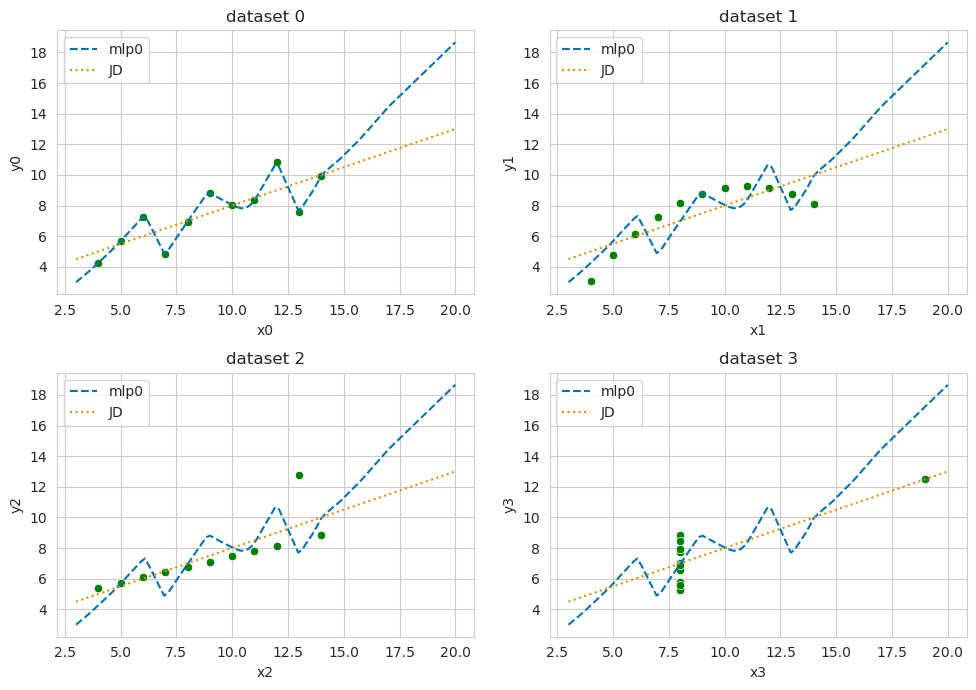

In [34]:
# YOUR CODE HERE
x = np.linspace(3, 20, 100)
x_sc = stsc.transform(x.reshape(-1,1))

y_mlp0 = mlps[0].predict(x_sc)
y_jd = model.predict(x.reshape(-1,1))

f,a = plt.subplots(2,2, figsize=(10,7))
a = a.ravel()
for p in range(0,4):
    sns.lineplot(x=x,y=y_mlp0,ax=a[p],label='mlp0', linestyle='--')
    sns.lineplot(x=x,y=y_jd,ax=a[p],label='JD',linestyle=':')
    sns.scatterplot(x=data.iloc[:,p],y=data.iloc[:,4+p],ax=a[p], color='g')
    a[p].set_title('dataset ' + str(p))
plt.tight_layout()

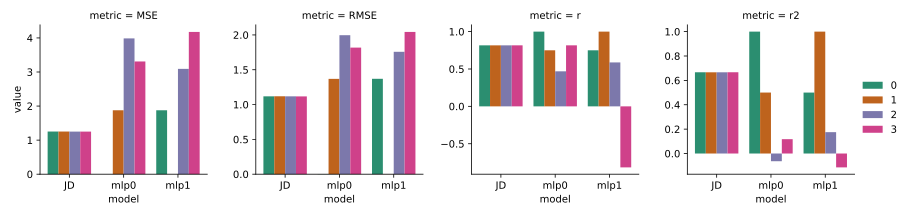

In [35]:
from IPython.display import SVG


SVG(filename='metrics.svg')

### Task 1.6
Given the plots from task 1.5 and the visualization of the 4 metrics for some of the models (if you are also interested in the performance of the MLP fitted on dataset 2 and dataset 3 - go ahead in an own notebook and try it ... but not in this assignment.) which of the following statements is correct?
<br>
<br>
'a': mlp[0] and mlp[1] are overfitted.
<br>
<br>'b': Johannes Daten's model is overfitted.
<br>
<br>'c': Neural Networks are robust against overfitting.
<br>
<br>'d': Overfitting is not as bad as underfitting, since only underfitting generates models with over-optimistic performance predictions.
<br>
<br>
_Use a variable x16 and assign your answer of the question (if 'e' would be the correct answer your code should look like this: x16='e'. There is only one correct answer._

In [36]:
# YOUR CODE HERE
x16='a'
print('The answer is ' + x16 + '.')

The answer is a.


## Task 2 - Active Learning
In the following task you will have a look at a simple binary classification problem where you will be using active learning to help your model learn faster. 

We have an array of training samples `X_train`, but unfortunately, there are no labels yet. To get access to labels, we can ask an omnisicient `oracle`, but this is costly and we should use it as little as possible. We train our model in several rounds, where each round we add one label by either using random or uncertainty sampling.

To check how our model is learning, we can evaluate the performance on a labelled test set.

In [37]:
X_train = pd.read_csv("ass02_task02_train.csv")
oracle = pd.read_csv("ass02_task02_oracle.csv")

test = pd.read_csv("ass02_task02_test.csv")
X_test = test.drop(columns=["y"])
y_test = test["y"]

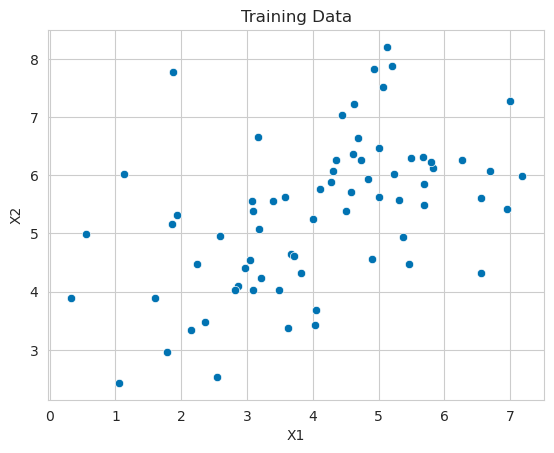

In [38]:
fig, axs = plt.subplots(1,1)
sns.scatterplot(X_train, x="X1", y="X2", ax=axs)
axs.set_title("Training Data")
plt.show()

### Task 2.1

First, you should set a benchmark. For this you use all labels provided by the oracle and the whole training set. Use the logistic regression from scikit as a model. To not complicate the task we use the default parameters. Use the variable name `lr_clf` for the classifier. After fitting, compute the accuracy score on the test set and store it to `acc_bm`!

In [59]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, oracle)
y_pred = lr_clf.predict(X_test)
acc_bm = accuracy_score(y_test, y_pred)

print(f"Benchmark accuracy: {acc_bm}")

70
Benchmark accuracy: 0.8333333333333334


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Task 2.2
In the following task you will implement the so called _random sampling_ strategy to select a sample that has not yet been used for training. 
Use the already given function `random_sampling()`, which receives as input the whole training set `X_train` and the indices of the samples already used for training `train_indices`. Your function returns the new index.

*Hint: Use the `seed()` and `choice()` methods provided by the `random` package. Set the random seed to 42!*

In [86]:
import random

def random_sampling(X_train, train_indices, model=None) -> int:
    # YOUR CODE HERE
    random.seed(42)
    all_indices = list(range(len(X_train)))
    possible_indices = [i for i in all_indices if i not in train_indices]
    new_index = random.choice(possible_indices)
    return new_index

### Task 2.3
Now we train several Logistic Regression models. At first, train a model only with the samples with the indices 7 and 25, you can get the labels from the oracle.

Afterwards, in each of the 30 rounds, fetch one additional label using your `random_sampling` method and train another Logistic Regression model.

Store the accuracies on the test data in the `accs_rs` list.

In [92]:
accs_rs = []
train_indices = [7, 25]

# YOUR CODE HERE
lr_clf.fit(X_train.iloc[train_indices], oracle.iloc[train_indices].values.ravel())
y_pred = lr_clf.predict(X_test)
accs_rs.append(accuracy_score(y_test, y_pred))

for _ in range(30):
    # YOUR CODE HERE
    train_indices.append(random_sampling(X_train, train_indices))
    lr_clf.fit(X_train.iloc[train_indices], oracle.iloc[train_indices].values.ravel())
    y_pred = lr_clf.predict(X_test)
    accs_rs.append(accuracy_score(y_test, y_pred))

### Task 2.4
Now we use a more sophisticated way to choose the next training sample, by evaluating the uncertainty of the model.

Use the already given function `random_sampling()`, which receives as input the whole training set `X_train`, the indices of the samples already used for training `train_indices` and the current fitted model `lr`. Your function returns the new index of the training set that has not been used for training and that has the highest uncertainty.

*Hint: Calculate the probabilities for each unseen training sample using the function `predict_proba()` provided by sklearn's `SVC` classifier.*

*Determine then the new index by choosing the sample with the highest uncertainty (entropy).*

In [96]:
def uncertainty_sampling(X_train, train_indices, model) -> int:
    # YOUR CODE HERE
    random.seed(42)
    all_indices = list(range(len(X_train)))
    possible_indices = [i for i in all_indices if i not in train_indices]
    probabilities = model.predict_proba(X_train.iloc[possible_indices])
    log_prob = np.log(probabilities)
    
    entropies = - np.sum(np.multiply(probabilities, log_prob), 1)
    
    entropy_idx = np.argmax(entropies)
    new_index = possible_indices[entropy_idx]
    return new_index

### Task 2.5
Again, we train several Logistic Regression models. At first, train a model only with the samples with the indices 7 and 25, you can get the labels from the oracle.

Afterwards, in each of the 30 rounds, fetch one additional label using your `uncertainty_sampling` method and train another Logistic Regression model.

Store the accuracies on the test data in the `accs_us` list.

In [97]:
accs_us = []
train_indices = [7, 25]

# YOUR CODE HERE
lr_clf.fit(X_train.iloc[train_indices], oracle.iloc[train_indices].values.ravel())
y_pred = lr_clf.predict(X_test)
accs_us.append(accuracy_score(y_test, y_pred))

for _ in range(30):
    # YOUR CODE HERE
    train_indices.append(uncertainty_sampling(X_train, train_indices, lr_clf))
    lr_clf.fit(X_train.iloc[train_indices], oracle.iloc[train_indices].values.ravel())
    y_pred = lr_clf.predict(X_test)
    accs_us.append(accuracy_score(y_test, y_pred))

### Visualizing the result
Using the below code cell you can visualize how the performance of our models improved while adding further labels to the training. 

If you correctly implemented the previous tasks, you can observe the following: even if at the beginning uncertainty sampling has a similar low point has random sampling, it quickly improves its performance and even outperforms the benchmark model.

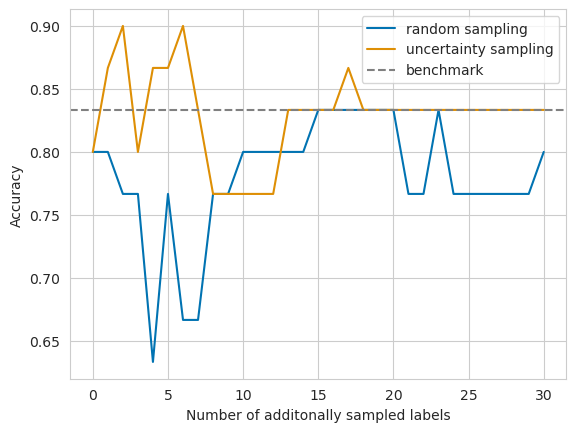

In [98]:
fig, axs = plt.subplots(1,1)
sns.lineplot(accs_rs, ax=axs, label="random sampling")
sns.lineplot(accs_us, ax=axs, label="uncertainty sampling")
axs.axhline(y=acc_bm, linestyle="--", color="grey", label="benchmark")

axs.set_xlabel("Number of additonally sampled labels")
axs.set_ylabel("Accuracy")
axs.legend()

plt.show()